In [34]:
import os
import sys
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm # progress bars :)
tqdm.pandas()

sns.set_context("paper")

In [2]:
pd.__version__

'0.24.2'

In [3]:
# Import Simulated Data with MRCC Values

In [4]:
%%bash
mkdir -p ../data
curl -L https://osf.io/4y7xd/download -o ../data/simreads-compare.dnainput.mrcc.csv.gz
ls ../data

simreads-compare.dnainput.csv.gz
simreads-compare.dnainput.mrcc.csv.gz
simreads-compare.dnainput.processed.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1247      0 --:--:-- --:--:-- --:--:--  1247
100 10.4M  100 10.4M    0     0  5158k      0  0:00:02  0:00:02 --:--:-- 19.2M


In [5]:
sDF = pd.read_csv("../data/simreads-compare.dnainput.mrcc.csv.gz")
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh
0,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1,0.190577,0.320984,0.319303,1.0,4993153,4967010,1594331,dna-21,4980081.5,0.047995,0.052436,0.052913
1,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,100,0.192184,0.322739,0.322739,1.0,49616,49718,16013,dna-21,4980081.5,0.047995,0.051623,0.053241
2,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1000,0.197087,0.332343,0.326269,1.0,5143,5049,1678,dna-21,4980081.5,0.047995,0.049115,0.053137
3,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,1.0,2523,2473,837,dna-21,4980081.5,0.047995,0.047607,0.053033
4,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1,0.107025,0.193865,0.192850,1.0,4993150,4967004,962929,dna-31,4980077.0,0.047995,0.051284,0.051808


In [6]:
sDF.shape

(273600, 18)

In [16]:
# first, let's get the simulation info from the comparison name

sDF["nt-freq"] = sDF["comparison_name"].str.extract(r"-(f\d)-")
sDF["model"] = sDF["comparison_name"].str.extract(r"-f\d-(\w*)-")
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pdist,pdist_diff,nt-freq,model
0,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1,0.190577,0.320984,0.319303,1.0,...,1594331,dna-21,4980081.5,0.047995,0.052436,0.052913,0.052675,-0.004679,f1,nogam
1,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,100,0.192184,0.322739,0.322739,1.0,...,16013,dna-21,4980081.5,0.047995,0.051623,0.053241,0.052432,-0.004437,f1,nogam
2,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1000,0.197087,0.332343,0.326269,1.0,...,1678,dna-21,4980081.5,0.047995,0.049115,0.053137,0.051126,-0.003131,f1,nogam
3,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,1.0,...,837,dna-21,4980081.5,0.047995,0.047607,0.053033,0.050320,-0.002325,f1,nogam
4,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1,0.107025,0.193865,0.192850,1.0,...,962929,dna-31,4980077.0,0.047995,0.051284,0.051808,0.051546,-0.003551,f1,nogam


## Simulation Parameters

#### Nucleotide substitution frequencies
- **f1: equal frequencies**, i.e. freq(A) = freq(C) = freq(G) = freq(T) = 0.25, 
- **f2: GC-rich**, i.e. freq(A) = 0.1, freq(C) = 0.3, freq(G) = 0.4, freq(T) = 0.2, 
- **f3: AT-rich**, i.e. freq(A) = freq(T) = 0.4, freq(C) = freq(G) = 0.1.

#### Evolutionary model
- **nogam**: GTR (six relative rates of nucleotide substitution)
- **gamma**: GTR+Γ (six rates and one Γ shape parameter)

#### Simulated Distances
- 0.05 --> 1.0 (stepping by 0.05)

In [14]:
# as a reminder, we have all the simulation info in a file "../simreads-info.csv.gz"
siminfo = pd.read_csv("../simreads-info.csv.gz")
siminfo.head()

,name,seed,freq(T),freq(C),freq(A),freq(G),rate(C-T),rate(A-T),rate(G-T),rate(A-C),rate(C-G),alpha,lgt1,lgt2,sites,core,p-distance
0,data-d0.05-f1-gamma-seed1,1,0.25,0.25,0.25,0.25,1.57881,0.188961,0.184296,0.277635,0.571672,0.239,4997288,5120205,5532162,4585331,0.041891
1,data-d0.05-f1-gamma-seed2,2,0.25,0.25,0.25,0.25,1.30318,0.337478,0.282495,0.389976,0.857990,0.313,4978497,5080470,5532500,4526467,0.043604
2,data-d0.05-f1-gamma-seed3,3,0.25,0.25,0.25,0.25,1.67580,0.370299,0.254104,0.507523,0.281850,0.290,4973221,4744010,5261801,4455430,0.042999
3,data-d0.05-f1-gamma-seed4,4,0.25,0.25,0.25,0.25,1.96182,0.237414,0.177498,0.475090,0.293021,0.322,4979167,5068807,5394562,4653412,0.042863
4,data-d0.05-f1-gamma-seed5,5,0.25,0.25,0.25,0.25,1.60369,0.260495,0.183868,0.338577,0.185786,0.291,4987735,5023978,5329783,4681930,0.042532


In [17]:
# next, get point estimate from pLow and pHigh
sDF["mc_pdist"] = (sDF["mc_pLow"] + sDF["mc_pHigh"])/2
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pdist,pdist_diff,nt-freq,model
0,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1,0.190577,0.320984,0.319303,1.0,...,1594331,dna-21,4980081.5,0.047995,0.052436,0.052913,0.052675,-0.004679,f1,nogam
1,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,100,0.192184,0.322739,0.322739,1.0,...,16013,dna-21,4980081.5,0.047995,0.051623,0.053241,0.052432,-0.004437,f1,nogam
2,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1000,0.197087,0.332343,0.326269,1.0,...,1678,dna-21,4980081.5,0.047995,0.049115,0.053137,0.051126,-0.003131,f1,nogam
3,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,1.0,...,837,dna-21,4980081.5,0.047995,0.047607,0.053033,0.050320,-0.002325,f1,nogam
4,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1,0.107025,0.193865,0.192850,1.0,...,962929,dna-31,4980077.0,0.047995,0.051284,0.051808,0.051546,-0.003551,f1,nogam


In [18]:
# let's make a column for the difference between the point estimate and the mc_pdist
sDF["pdist_diff"] = sDF["true p-distance"] - sDF["mc_pdist"]
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pdist,pdist_diff,nt-freq,model
0,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1,0.190577,0.320984,0.319303,1.0,...,1594331,dna-21,4980081.5,0.047995,0.052436,0.052913,0.052675,-0.004679,f1,nogam
1,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,100,0.192184,0.322739,0.322739,1.0,...,16013,dna-21,4980081.5,0.047995,0.051623,0.053241,0.052432,-0.004437,f1,nogam
2,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1000,0.197087,0.332343,0.326269,1.0,...,1678,dna-21,4980081.5,0.047995,0.049115,0.053137,0.051126,-0.003131,f1,nogam
3,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,1.0,...,837,dna-21,4980081.5,0.047995,0.047607,0.053033,0.050320,-0.002325,f1,nogam
4,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1,0.107025,0.193865,0.192850,1.0,...,962929,dna-31,4980077.0,0.047995,0.051284,0.051808,0.051546,-0.003551,f1,nogam


In [19]:
# there are some comparisons with no k-mers/hashes in common -- let's eliminate these
sDF = sDF[sDF["num_common"] != 0]
sDF.shape

(155143, 22)

In [20]:
# let's just work with scaled=1 to start:
s1DF = sDF[sDF["scaled"] == 1]

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1)')

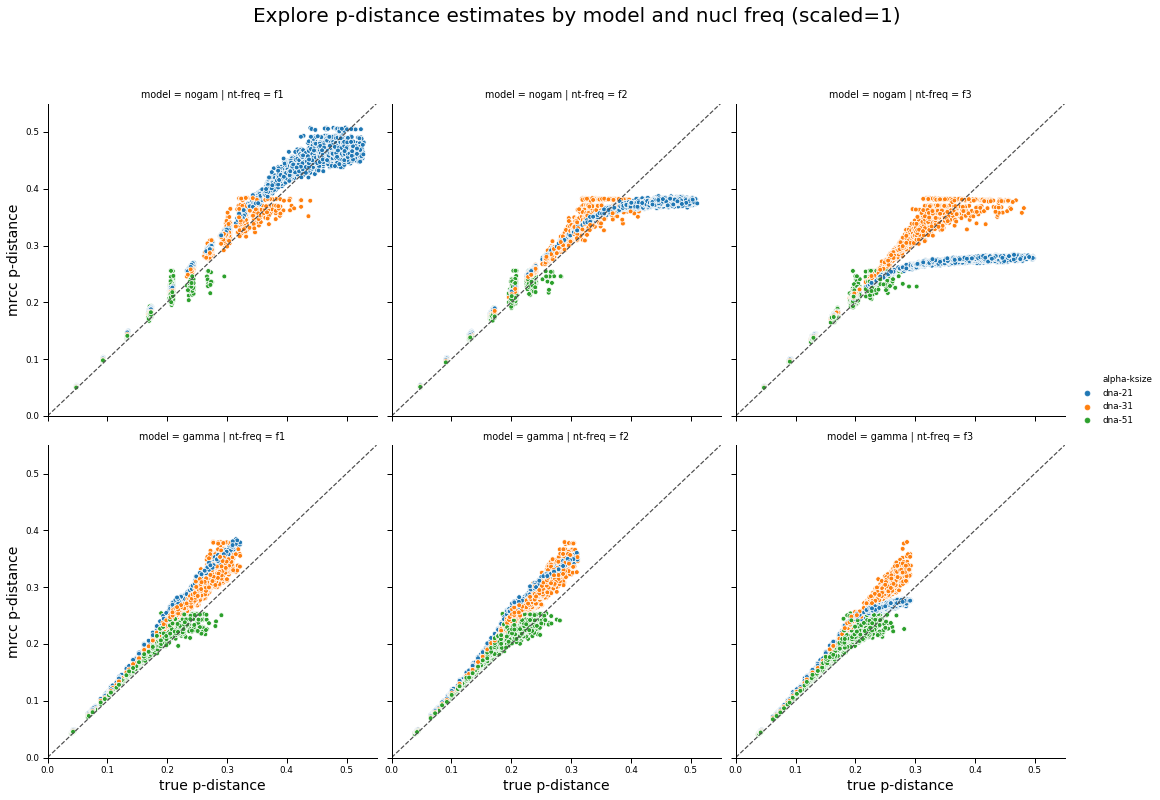

In [32]:
data_to_plot = s1DF # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="mc_pdist", col="nt-freq", row="model", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1)", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1)')

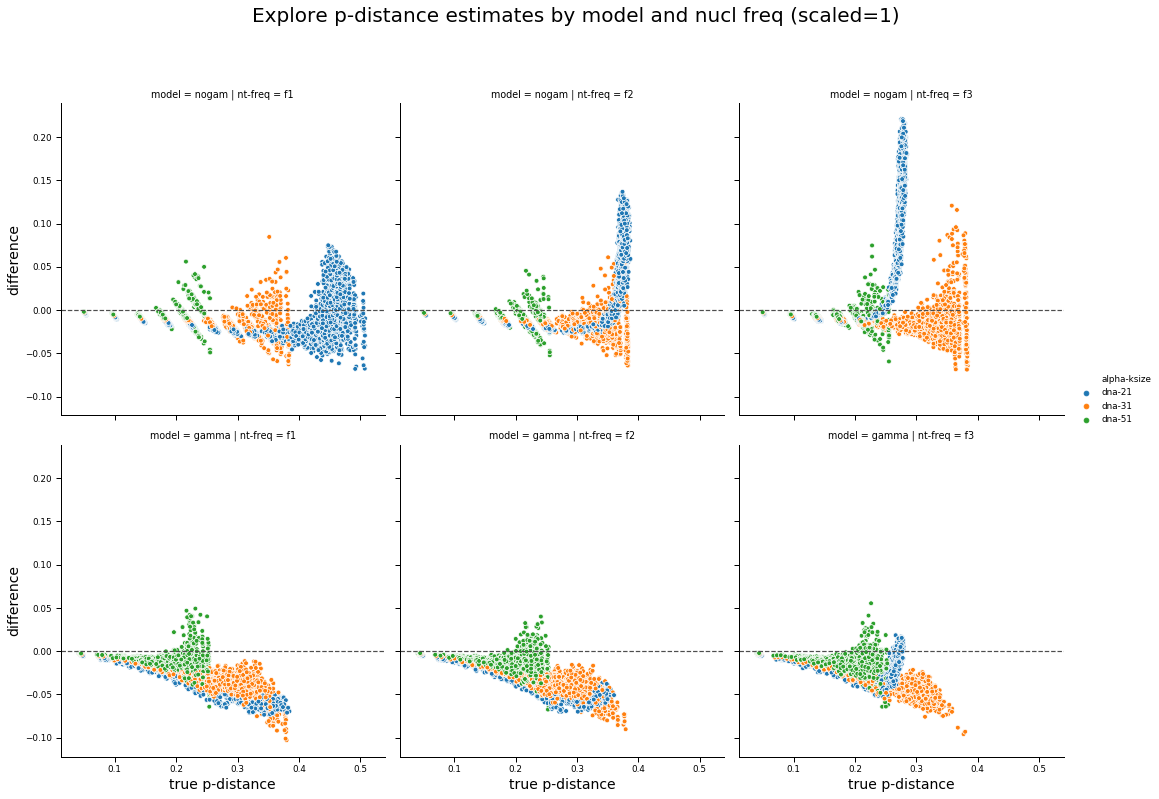

In [31]:
d = sns.relplot(data=data_to_plot, x="mc_pdist", y="pdist_diff", col="nt-freq", row="model", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1)", x=0.5, y=1.10, size=20)

# Check for true p-value w/in mc_pLow and mc_pHigh

In [37]:
def p_in_ci(row):
    true_p = row["true p-distance"]
    low = row["mc_pLow"]
    high = row["mc_pHigh"]
    if true_p >= low and true_p <= high:
        return True
    else:
        return False

In [38]:
sDF["p_in_mrcc_ci"] = sDF.progress_apply(p_in_ci, axis=1)
#simDF.progress_apply(mrcc_maxcontain, axis=1)

100%|██████████| 155143/155143 [00:03<00:00, 38919.93it/s]


In [39]:
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pdist,pdist_diff,nt-freq,model,p_in_mrcc_ci
0,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1,0.190577,0.320984,0.319303,1.0,...,dna-21,4980081.5,0.047995,0.052436,0.052913,0.052675,-0.004679,f1,nogam,False
1,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,100,0.192184,0.322739,0.322739,1.0,...,dna-21,4980081.5,0.047995,0.051623,0.053241,0.052432,-0.004437,f1,nogam,False
2,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1000,0.197087,0.332343,0.326269,1.0,...,dna-21,4980081.5,0.047995,0.049115,0.053137,0.051126,-0.003131,f1,nogam,False
3,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,1.0,...,dna-21,4980081.5,0.047995,0.047607,0.053033,0.050320,-0.002325,f1,nogam,True
4,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1,0.107025,0.193865,0.192850,1.0,...,dna-31,4980077.0,0.047995,0.051284,0.051808,0.051546,-0.003551,f1,nogam,False


In [41]:
sDF_inCI = sDF[sDF["p_in_mrcc_ci"] ==True]
sDF_inCI.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pdist,pdist_diff,nt-freq,model,p_in_mrcc_ci
3,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,1.0,...,dna-21,4980081.5,0.047995,0.047607,0.053033,0.050320,-0.002325,f1,nogam,True
11,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,51,2000,0.037556,0.073050,0.073050,1.0,...,dna-51,4980057.0,0.047995,0.047114,0.052969,0.050042,-0.002046,f1,nogam,True
18,data-d0.05-f1-nogam-seed54,data-d0.05-f1-nogam-seed54-seq1,data-d0.05-f1-nogam-seed54-seq2,dna,31,1000,0.117205,0.211656,0.208011,1.0,...,dna-31,5004172.5,0.048052,0.046984,0.050763,0.048873,-0.000821,f1,nogam,True
19,data-d0.05-f1-nogam-seed54,data-d0.05-f1-nogam-seed54-seq1,data-d0.05-f1-nogam-seed54-seq2,dna,31,2000,0.116689,0.211240,0.206789,1.0,...,dna-31,5004172.5,0.048052,0.046375,0.051519,0.048947,-0.000895,f1,nogam,True
22,data-d0.05-f1-nogam-seed54,data-d0.05-f1-nogam-seed54-seq1,data-d0.05-f1-nogam-seed54-seq2,dna,51,1000,0.038837,0.074862,0.074679,1.0,...,dna-51,5004152.5,0.048052,0.047440,0.051707,0.049574,-0.001522,f1,nogam,True
